## **Assignment on Classification**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Do the following in the iris dataset**
## **1. Read the dataset to python environment**

In [ ]:
# loading the iris dataset as saving it as data
data = pd.read_excel('/content/iris (1).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#copying and saving the dataset to df inorder to retain the original iris dataset
df = data.copy()
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## **2. Do the necessary pre-processing steps**


In [ ]:
# gives an idea about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# gives the dimension of iris dataset
df.shape

(150, 5)

### So our iris dataset comprises 150 rows and 5 columns, with 3 columns containing null values. It includes a categorical column and four columns with float-type variables.


In [ ]:
# gives statistical description of the iris dataset
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Handling missing values.

In [ ]:
# gives the count of null values in each column
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

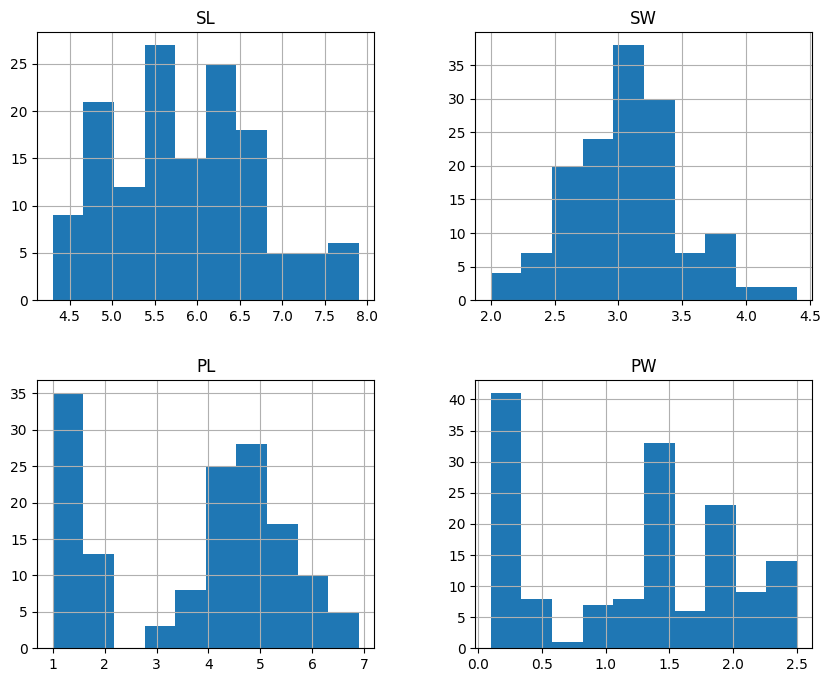

In [ ]:
# to get the distribution of data in the numerical columns
freq_graph = df.select_dtypes(include='float64')
freq_graph.hist(figsize=(10,8));

In [ ]:
# filling the missing values with their respective medians
null_col = df[['SL','SW', 'PL']]
for i in null_col:
  df[i]=df[i].fillna(df[i].median())

In [ ]:
# checking for null values
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# gives the number of duplicated values in the dataset
df.duplicated().sum()

3

In [ ]:
# dropping the duplicated values
df.drop_duplicates(inplace=True)

In [ ]:
df['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

### Handling outliers.

<Axes: >

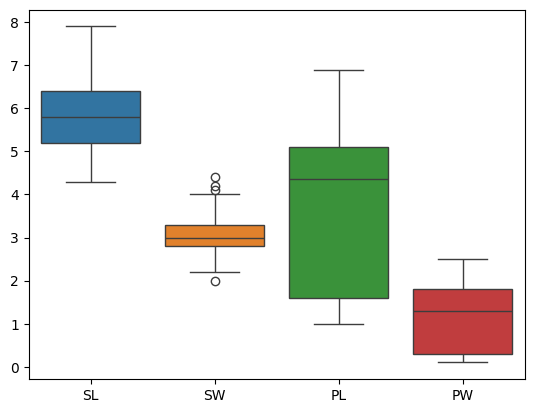

In [ ]:
# finding outliers
sns.boxplot(df)

In [ ]:
# SW column contains outliers;  finding the outliers using IQR method and then clipping those values
Q1=np.percentile(df['SW'],25,method='midpoint')
Q2=np.percentile(df['SW'],50,method='midpoint')
Q3=np.percentile(df['SW'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

IQR = Q3-Q1
print('IQR is :', IQR)

lower_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)

outlier=[]
for x in df['SW']:
  if( (x < lower_lim) or (x > Up_lim)):
    outlier.append(x)
print('Outliers are: ', outlier)

Q1 is   2.8
Q2 is   3.0
Q3 is   3.3
IQR is : 0.5
lower whisker is  2.05
upper whisker is  4.05
Outliers are:  [4.4, 4.1, 4.2, 2.0]


In [ ]:
# Using the clip function
df['SW']=df['SW'].clip(lower=lower_lim, upper=Up_lim)
outlier=[]
for x in df['SW']:
  if( (x < lower_lim) or (x > Up_lim)):
    outlier.append(x)
print(outlier)

[]


<Axes: >

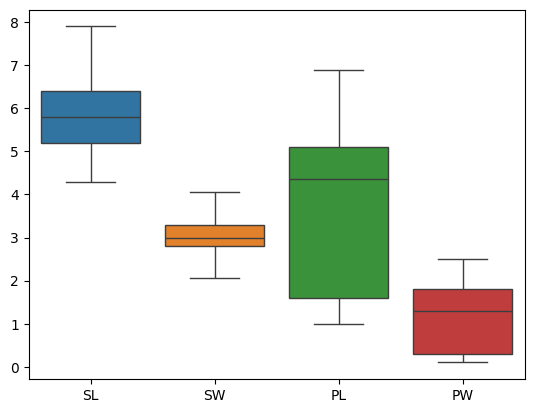

In [ ]:
sns.boxplot(df)

In [ ]:
df.shape

(147, 5)

### Data Visualization

Text(0.5, 1.0, 'Count of Classification variables')

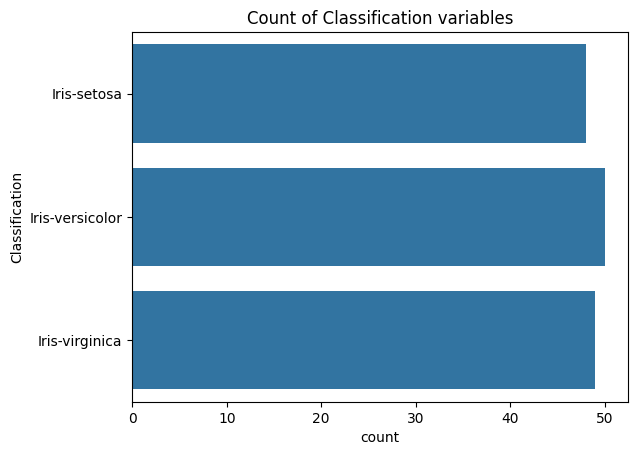

In [ ]:
# to know the distribution of the 'Classification' categories
sns.countplot(df['Classification'])
plt.title('Count of Classification variables')

In [ ]:
df['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

<Axes: xlabel='SL', ylabel='SW'>

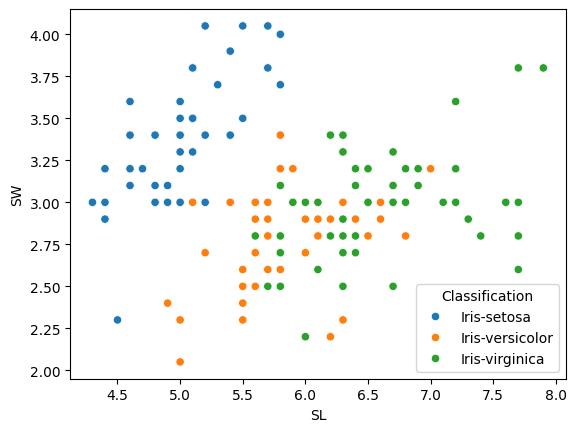

In [ ]:
# Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SL', y='SW',
                hue='Classification', data=df, )



*   iris-setosa has the largest sw with samll sl.
*   sw & sl value lies intermediate between the other two classification for iris-versicolor.
*   iris-virginica has the largest sl.


<Axes: xlabel='PL', ylabel='PW'>

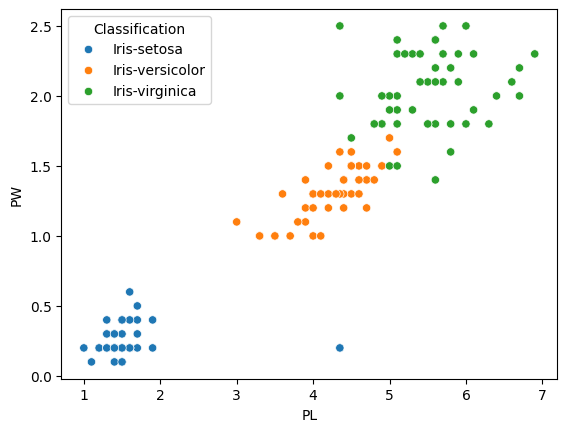

In [ ]:
# Comparing Petal Length and Petal Width
sns.scatterplot(x='PL', y='PW',
                hue='Classification', data=df, )


*   iris-setosa has the smallest pw & pl.
*    pw & pl value lies intermediate between the other two classification for iris-versicolor.
*   iris-virginica has the largest pw & pl.

### The iris dataset is classified into three different classes and have an equal number (50 each) of data-points for each class in the dataset before the removal of duplicates ( after dropping the duplicated values, the count in each class are: Iris-setosa: 48,  Iris-versicolor: 50, Iris-virginica: 49).
### The number of outliers in the data is very small, so normalizing the data is not mandatory. Encoding is also not needed here as models have been built both with and without label encoding applied to the 'Classification' variable, and there is no noticeable variation observed in the dataset.

In [ ]:
# applying label encoding to the target variable
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


### Correlation

In [ ]:
corr= df.groupby('Classification').corr()
corr

SL        SW        PL        PW
Classification                                           
0              SL  1.000000  0.594591 -0.081542  0.249997
               SW  0.594591  1.000000 -0.003721  0.170691
               PL -0.081542 -0.003721  1.000000 -0.003328
               PW  0.249997  0.170691 -0.003328  1.000000
1              SL  1.000000  0.453838  0.734325  0.518523
               SW  0.453838  1.000000  0.497031  0.659486
               PL  0.734325  0.497031  1.000000  0.771257
               PW  0.518523  0.659486  0.771257  1.000000
2              SL  1.000000  0.407790  0.757025  0.213207
               SW  0.407790  1.000000  0.241177  0.535405
               PL  0.757025  0.241177  1.000000  0.193369
               PW  0.213207  0.535405  0.193369  1.000000

<Axes: ylabel='Classification-None'>

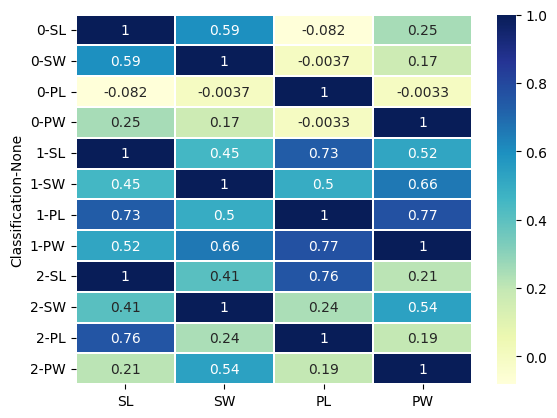

In [ ]:
sns.heatmap(corr,annot = True, linewidths=0.2, cmap='YlGnBu')


*   A very strong positive correlation between petal length and petal width about 0.77 is observed for Iris-Versicolor only.
*   A strong relationship between petal length and sepal length is seen  for Iris-Versicolor & Iris-Virginica at 0.73 and 0.76 respectively.
*   A good relationship is observed for sepal width and petal width  for Iris-Versicolor at 0.66 and Iris-Virginica at 0.54.
*   Iris-Setosa shows a good relation only for sepal length and sepal width at 0.59.


### None is removed here, as there are only four features present.










## **3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session).**

### **Classification Models**

In [ ]:
# identifying the target(y) and feature(x) variables
y = df['Classification']
x = df.drop('Classification', axis = 1)

In [ ]:
# dividing 25% of data to test and 75% of data to train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)

In [ ]:
# classification metric
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score,confusion_matrix

## **MODEL 1: LOGISTIC REGRESSION**

In [ ]:
# I got the error message:  /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# so scaling the training data

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fitting scaler on train and test data and transforming it
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_model = log_reg.fit(x_train_scaled,y_train)
y_log_pred = log_reg.predict(x_test_scaled)
y_log_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2])

In [ ]:
# this is a multi-class classifiaction problem
#'weighted': Calculates metrics for each class separately and then takes the weighted mean of the scores based on the support (the number of true instances) for each class.

In [ ]:
acc_log_reg = accuracy_score(y_test,y_log_pred)
Prec_log_reg = precision_score(y_test,y_log_pred, average='weighted')
recall_log_reg = recall_score(y_test,y_log_pred, average='weighted')
F1_log_reg = f1_score(y_test,y_log_pred, average='weighted')

In [ ]:
acc_log_reg

0.972972972972973

In [ ]:
log_reg_metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [Prec_log_reg, recall_log_reg, F1_log_reg]
})

log_reg_metrics_df

,Metric,Logistic Regression
0,Precision,0.974903
1,Recall,0.972973
2,F1-Score,0.972762


## **MODEL 2: KNN**

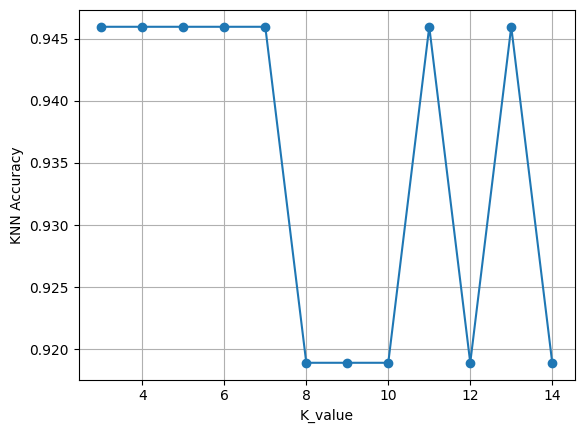

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
  classifier.fit(x_train,y_train)
  y_pred_knn  =classifier.predict(x_test)
  accuracy_knn =  accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('KNN Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 4 ,metric = 'minkowski',p = 2)
classifier.fit(x_train,y_train)
y_knn_pred  =classifier.predict(x_test)
KNN_Accuracy = accuracy_score(y_test,y_knn_pred)
KNN_Accuracy

0.9459459459459459

In [ ]:
Prec_knn = precision_score(y_test,y_knn_pred, average='weighted')
recall_knn = recall_score(y_test,y_knn_pred, average='weighted')
F1_knn = f1_score(y_test,y_knn_pred, average='weighted')

In [ ]:
knn_metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'KNN': [Prec_knn, recall_knn, F1_knn]
})

knn_metrics_df

,Metric,KNN
0,Precision,0.945946
1,Recall,0.945946
2,F1-Score,0.945946


### **Scaled KNN Model**

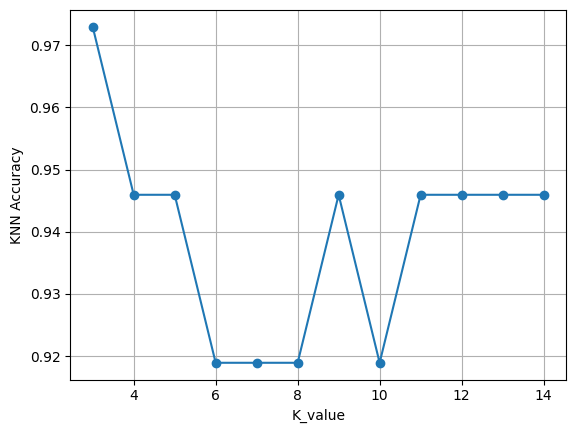

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
  knn_model = classifier.fit(x_train_scaled,y_train)
  y_pred_knn  =classifier.predict(x_test_scaled)
  accuracy_knn =  accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('KNN Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 1 ,metric = 'minkowski',p = 2)
classifier.fit(x_train_scaled,y_train)
y_pred_knn  =classifier.predict(x_test_scaled)
Scaled_knn_Accuracy = accuracy_score(y_test,y_pred_knn)
Scaled_knn_Accuracy

0.972972972972973

In [ ]:
Prec_knn_scaled = precision_score(y_test,y_pred_knn, average='weighted')
recall_knn_scaled = recall_score(y_test,y_pred_knn, average='weighted')
F1_knn_scaled = f1_score(y_test,y_pred_knn, average='weighted')

In [ ]:
scaled_knn_metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'KNN_Scaled': [Prec_knn_scaled, recall_knn_scaled, F1_knn_scaled]
})

scaled_knn_metrics_df

,Metric,KNN_Scaled
0,Precision,0.974903
1,Recall,0.972973
2,F1-Score,0.972762


In [ ]:
Acc = pd.DataFrame({'Model': ['KNN', 'Scaled KNN'], 'Accuracy':[KNN_Accuracy,Scaled_knn_Accuracy]})
Acc

,Model,Accuracy
0,KNN,0.945946
1,Scaled KNN,0.972973


In [ ]:
pd.merge(knn_metrics_df,scaled_knn_metrics_df,on = 'Metric')

,Metric,KNN,KNN_Scaled
0,Precision,0.945946,0.974903
1,Recall,0.945946,0.972973
2,F1-Score,0.945946,0.972762


### Accuracy and F-1 Score for the scaled KNN Model gave better results, so this model is taken.


## **MODEL 3: SVM (Support Vector Machine)**

In [ ]:
#1 linear kernel
from sklearn.svm import SVC
sv_cl_linear= SVC(kernel='linear')
sv_cl_linear.fit(x_train_scaled,y_train)
y_svc_linear_pred = sv_cl_linear.predict(x_test_scaled)

In [ ]:
Accuracy_svc_linear = accuracy_score(y_test,y_svc_linear_pred)
Accuracy_svc_linear

0.9459459459459459

In [ ]:
#2 polynomial kernel
from sklearn.svm import SVC
sv_cl_linear= SVC(kernel='poly')
sv_cl_linear.fit(x_train_scaled,y_train)
y_svc_linear_pred = sv_cl_linear.predict(x_test_scaled)

In [ ]:
Accuracy_svc_poly = accuracy_score(y_test,y_svc_linear_pred)
Accuracy_svc_poly

0.8378378378378378

In [ ]:
#3 Gaussian (radial basis function) kernel
from sklearn.svm import SVC
sv_cl_rbf = SVC(kernel='rbf')
svm_model = sv_cl_rbf.fit(x_train_scaled,y_train)
y_svc_rbf_pred = sv_cl_rbf.predict(x_test_scaled)

In [ ]:
Accuracy_svc_rbf = accuracy_score(y_test,y_svc_rbf_pred)
Accuracy_svc_rbf

0.972972972972973

### The above code clearly states that the accuracy for the svc model with kernal 'rbf' is greater than the models with kernals 'linear' and 'poly'. Therefore SVM Model with Kernal rbf is taken here.

In [ ]:
Prec_svc_rbf = precision_score(y_test,y_svc_rbf_pred, average='weighted')
recall_svc_rbf = recall_score(y_test,y_svc_rbf_pred, average='weighted')
F1_svc_rbf = f1_score(y_test,y_svc_rbf_pred, average='weighted')

svc_rbf_df = pd.DataFrame( { 'Metric': ['Precision', 'Recall', 'F1-Score'],
    'SVC RBF': [Prec_svc_rbf, recall_svc_rbf, F1_svc_rbf]
})

svc_rbf_df

,Metric,SVC RBF
0,Precision,0.974903
1,Recall,0.972973
2,F1-Score,0.972762


## **MODEL 4: DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_model = dt_clf.fit(x_train_scaled,y_train)

In [ ]:
y_dt_pred = dt_clf.predict(x_test_scaled)
Accuracy_DT = accuracy_score (y_test, y_dt_pred)
Accuracy_DT

0.918918918918919

In [ ]:
Prec_dt = precision_score(y_test,y_dt_pred, average='weighted')
recall_dt = recall_score(y_test,y_dt_pred, average='weighted')
F1_dt = f1_score(y_test,y_dt_pred, average='weighted')

dt_df = pd.DataFrame( { 'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [Prec_dt, recall_dt ,F1_dt]
})

dt_df

,Metric,Decision Tree
0,Precision,0.921581
1,Recall,0.918919
2,F1-Score,0.919228


## **MODEL 5: RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_model = rf_clf.fit(x_train_scaled,y_train)

In [ ]:
y_rf_pred = rf_clf.predict(x_test_scaled)
Accuracy_RF = accuracy_score (y_test, y_rf_pred)
Accuracy_RF

0.9459459459459459

In [ ]:
# hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf_clf1= RandomForestClassifier()
rf_clf1.fit(x_train,y_train)
rf_clf1 = RandomForestClassifier(n_estimators =20,max_depth = 20, min_samples_split = 3,criterion = 'entropy' )
rf_clf1.fit(x_train,y_train)
y_pred = rf_clf1.predict(x_test)
print('Accuracy : ',accuracy_score (y_test, y_pred))

Accuracy :  0.9459459459459459


### When hyperparameter tuning is done for the random forest algorithm, it yielded the same accuracy as above.ie. Accuracy :  0.9459459459459459.

In [ ]:
Prec_rf = precision_score(y_test,y_rf_pred, average='weighted')
recall_rf = recall_score(y_test,y_rf_pred, average='weighted')
F1_rf = f1_score(y_test,y_rf_pred, average='weighted')

rf_df = pd.DataFrame( { 'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Random Forest': [Prec_rf, recall_rf ,F1_rf]
})

rf_df

,Metric,Random Forest
0,Precision,0.945946
1,Recall,0.945946
2,F1-Score,0.945946


### **Comparing the accuracies, classification metrics, and cross validation scores of all the models.**

### 1. Accuracy.

In [ ]:
Accuracy = pd.DataFrame({'Models': ['Logistic Regression', 'Scaled KNN','SVM_rbf','Decision Tree', 'Random Forest'],'Accuracies':[acc_log_reg,Scaled_knn_Accuracy,Accuracy_svc_rbf,Accuracy_DT,Accuracy_RF]})
Accuracy

,Models,Accuracies
0,Logistic Regression,0.972973
1,Scaled KNN,0.972973
2,SVM_rbf,0.972973
3,Decision Tree,0.918919
4,Random Forest,0.945946


### 2. Classification Metrics.

In [ ]:
Classification_metrics= pd.merge(log_reg_metrics_df, scaled_knn_metrics_df, on='Metric')
Classification_metrics = pd.merge(Classification_metrics, svc_rbf_df, on='Metric')
Classification_metrics = pd.merge(Classification_metrics, dt_df, on='Metric')
Classification_metrics = pd.merge(Classification_metrics, rf_df, on='Metric')

Classification_metrics

,Metric,Logistic Regression,KNN_Scaled,SVC RBF,Decision Tree,Random Forest
0,Precision,0.974903,0.974903,0.974903,0.921581,0.945946
1,Recall,0.972973,0.972973,0.972973,0.918919,0.945946
2,F1-Score,0.972762,0.972762,0.972762,0.919228,0.945946


### Confusion Matrix

In [ ]:
# for logistic regression
confusion_matrix(y_test,y_log_pred)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 13]])

In [ ]:
# for scaled knn
confusion_matrix(y_test,y_pred_knn)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 13]])

In [ ]:
# for svm_rbf
confusion_matrix(y_test,y_svc_rbf_pred)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 13]])

In [ ]:
# for decision tree
confusion_matrix(y_test,y_dt_pred)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  2, 11]])

In [ ]:
# for random forest
confusion_matrix(y_test,y_rf_pred)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 12]])

### The diagonal elements of the matrix represent the instances that are correctly classified, while off-diagonal elements represent misclassifications. All the models correctly classified iris-setosa instances, one instance of iris-versicolor is misclassified by every model; logistic regression, knn, and svm classified all instances of iris-Virginia correctly while the decision tree misclassified two instances of versicolor as virginica, and random forest misclassified one instance from versicolor as virginica.

### 3. Cross-Validation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)
# stratified cv is taken, as the mean cv scores of stratified k-fold yielded better score than that of K-fold cross validation.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
log_cv_score = cross_val_score(log_model,x,y,cv = stratified_cv)
knn_cv_score = cross_val_score(knn_model,x,y,cv = stratified_cv)
svm_cv_score = cross_val_score(svm_model,x,y,cv = stratified_cv)
dt_cv_score = cross_val_score(dt_model,x,y,cv = stratified_cv)
rf_cv_score = cross_val_score(rf_model,x,y,cv = stratified_cv)

In [ ]:
cv_log = log_cv_score.mean()
knn_cv = knn_cv_score.mean()
svm_cv = svm_cv_score.mean()
dt_cv = dt_cv_score.mean()
rf_cv = rf_cv_score.mean()

In [ ]:
cv_scores = pd.DataFrame({'Models':['Logistic Regression','Scaled KNN','SVM_rbf','Decision Tree','Random Forest'],'Mean CV Scores':[cv_log,knn_cv,svm_cv,dt_cv,rf_cv]})

In [ ]:
cv_scores

,Models,Mean CV Scores
0,Logistic Regression,0.938571
1,Scaled KNN,0.951905
2,SVM_rbf,0.945238
3,Decision Tree,0.946190
4,Random Forest,0.966667


In [ ]:
pd.merge(Accuracy,cv_scores,on = 'Models')

,Models,Accuracies,Mean CV Scores
0,Logistic Regression,0.972973,0.938571
1,Scaled KNN,0.972973,0.951905
2,SVM_rbf,0.972973,0.945238
3,Decision Tree,0.918919,0.946190
4,Random Forest,0.945946,0.966667


## **INFERENCE :**

*   **Logistic Regression, KNN (with and without scaling), SVM (linear, poly, rbf kernels tested), Decision Tree, and Random Forest are the five classification models built here.**

*   **The accuracies, classification metrics, and cross-validation scores of all models are observed. All the models have accuracies above 90%. The accuracies for logistic regression, scaled knn and svm_rbf are found to be same and slightly higher than that for random forest and decison tree.**

*   **The same is the case with precision, recall, and f-1 score of the models. Confusion metrics for all models are described above.**

*   **In the case of stratified mean cross-validation scores, all models have consistent scores above 93%. The scores for Random Forest > scaled Knn > Decision Tree > SVM_rbf > Logistic Regression.**

* **After comparing the classification metrics and cross-validation scores across the five models, it can be concluded that the Scaled k-Nearest Neighbors (kNN) model gave better results than the others in terms of performance on the training data, making it as the best model in this scenario. But if generalization performance is taken as the primary concern for selecting the best classification model, then Random Forest emerges as the most promising model here.**


